In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PYthon Spark Create RDD Ex").config('spark.some.config.option', 'some-value')\
.getOrCreate()
import numpy as np
import pandas as pd

In [2]:
df = spark.read.csv('German_Credit.csv',
# # #
sep=',',
encoding='UTF-8',
comment=None,
header=True,
inferSchema=True)

In [3]:
num_cols = ['Account Balance','No of dependents']
df.select(num_cols).describe().show()

+-------+------------------+-------------------+
|summary|   Account Balance|   No of dependents|
+-------+------------------+-------------------+
|  count|              1000|               1000|
|   mean|             2.577|              1.155|
| stddev|1.2576377271108936|0.36208577175319395|
|    min|                 1|                  1|
|    max|                 4|                  2|
+-------+------------------+-------------------+



In [4]:
# in spark quartiles not founds, for this
def describe_pd(df_in, columns, deciles=False): 
    '''
    Function to union the basic stats results and deciles
    :param df_in: the input dataframe
    :param columns: the cloumn name list of the numerical variable
    :param deciles: the deciles output
    :return : the numerical describe info. of the input dataframe
    :author: Ming Chen and Wenqiang Feng
    :email:  von198@gmail.com
    '''
    if deciles:
        percentiles = np.array(range(0, 110, 10))
    else:
        percentiles = [25, 50, 75]
    percs = np.transpose([np.percentile(df_in.select(x).collect(),percentiles) for x in columns])
    percs = pd.DataFrame(percs, columns=columns) 
    percs['summary'] = [str(p) + '%' for p in percentiles]
    spark_describe = df_in.describe().toPandas()
    new_df = pd.concat([spark_describe, percs],ignore_index=True) 
    new_df = new_df.round(2)
    return new_df[['summary'] + columns]

In [5]:
describe_pd(df,num_cols)

,summary,Account Balance,No of dependents
0,count,1000,1000
1,mean,2.577,1.155
2,stddev,1.2576377271108936,0.36208577175319395
3,min,1,1
4,max,4,2
5,25%,1.0,1.0
6,50%,2.0,1.0
7,75%,4.0,1.0


In [6]:
quantiles = df.approxQuantile("Account Balance", [0.25, 0.5, 0.75], 0)

In [7]:
describe_pd(df,num_cols,deciles=True)

,summary,Account Balance,No of dependents
0,count,1000,1000
1,mean,2.577,1.155
2,stddev,1.2576377271108936,0.36208577175319395
3,min,1,1
4,max,4,2
5,0%,1.0,1.0
6,10%,1.0,1.0
7,20%,1.0,1.0
8,30%,2.0,1.0
9,40%,2.0,1.0


In [8]:
from pyspark.sql.functions import col, skewness, kurtosis 
var = 'Age (years)'
df.select(skewness(var),kurtosis(var)).show()

+---------------------+---------------------+
|skewness(Age (years))|kurtosis(Age (years))|
+---------------------+---------------------+
|   1.0231743160548064|   0.6114371688367672|
+---------------------+---------------------+



TypeError: 'Column' object is not callable

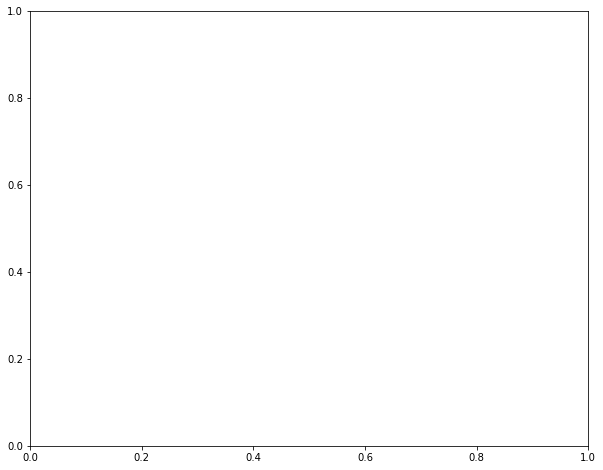

In [9]:
import matplotlib.pyplot as plt
var = 'Age (years)'
x = df[var]
bins = np.arange(0, 100, 5.0)
plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='gold',ec='black',weights=np.zeros_like(x) + 100. / x.size)
plt.xlabel(x)
plt.ylabel('percentage')
plt.xticks(bins)
plt.show()
fig.savefig(var+".pdf", bbox_inches='tight')

In [10]:
# import pyspark.sql.functions as F

# # If the column Pclass is numeric
# df = df.withColumn("AddCol",F.when(F.col("Pclass") == F.lit(3),"three").otherwise("notthree"))

# # If the column Pclass is string
# df = df.withColumn("AddCol",F.when(F.col("Pclass") == F.lit("3"),"three").otherwise("notthree"))

In [21]:
def f(x): print(x)


In [25]:
df = spark.sparkContext.parallelize([(1,2,3,'a b c'), (4,5,6,'d e f'), (7, 8, 9, 'g h i')]).foreach(f)

AttributeError: 'NoneType' object has no attribute 'parallelize'